# 🎓 Graduation Project: Predicting Goals and Assists 

In [2]:
import pandas as pd
import numpy as np
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report

In [3]:
data = pd.read_csv(r"C:\Mostafa\Collage\Graduiation Project\Datasets\Modified_Players_Data.csv")

## 📊 Dataset Overview

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   546 non-null    int64  
 1   Name                 546 non-null    object 
 2   position             546 non-null    object 
 3   team                 546 non-null    object 
 4   goals_scored         546 non-null    int64  
 5   saves_per_90         546 non-null    float64
 6   penalties_saved      546 non-null    int64  
 7   own_goals            546 non-null    int64  
 8   clean_sheets         546 non-null    int64  
 9   saves                546 non-null    int64  
 10  minutes              546 non-null    int64  
 11  yellow_cards         546 non-null    int64  
 12  red_cards            546 non-null    int64  
 13  Goals                546 non-null    int64  
 14  Wins                 546 non-null    int64  
 15  Losses               546 non-null    int

In [5]:
data.head()

,ID,Name,position,team,goals_scored,saves_per_90,penalties_saved,own_goals,clean_sheets,saves,...,Big Chances Created,Cross accuracy %,Accurate long balls,Fouls,Headed goals,Shots,Shots on target,Shooting accuracy %,Big chances missed,Saves
0,1,Folarin Balogun,FWD,Arsenal,0,0.0,0,0,0,0,...,0.0,NaN,NaN,0,0.0,0.0,0.0,0%,0.0,NaN
1,2,Mohamed Elneny,MID,Arsenal,0,0.0,0,0,0,0,...,0.0,0%,0.0,1,0.0,2.0,1.0,50%,0.0,NaN
2,3,Kai Havertz,MID,Arsenal,4,0.0,0,0,4,0,...,8.0,17%,8.0,49,3.0,69.0,28.0,41%,13.0,NaN
3,4,Jakub Kiwior,DEF,Arsenal,0,0.0,0,0,1,0,...,1.0,25%,21.0,10,1.0,NaN,NaN,NaN,NaN,NaN
4,5,Eddie Nketiah,FWD,Arsenal,5,0.0,0,0,6,0,...,2.0,NaN,NaN,24,0.0,38.0,12.0,32%,4.0,NaN


In [6]:
data.columns

Index(['ID', 'Name', 'position', 'team', 'goals_scored', 'saves_per_90',
       'penalties_saved', 'own_goals', 'clean_sheets', 'saves', 'minutes',
       'yellow_cards', 'red_cards', 'Goals', 'Wins', 'Losses',
       'Goals Conceded', 'Tackles', 'Tackle success %', 'Interceptions',
       'Recoveries', 'Duels won', 'Duels lost', 'Aerial battles won',
       'Aerial battles lost', 'Assists', 'Passes', 'Big Chances Created',
       'Cross accuracy %', 'Accurate long balls', 'Fouls', 'Headed goals',
       'Shots', 'Shots on target', 'Shooting accuracy %', 'Big chances missed',
       'Saves'],
      dtype='object')

## 🔍 Exploratory Data Analysis (EDA)

In [7]:
numeric_data = data.select_dtypes(include='number')
corr_matrix = numeric_data.corr()

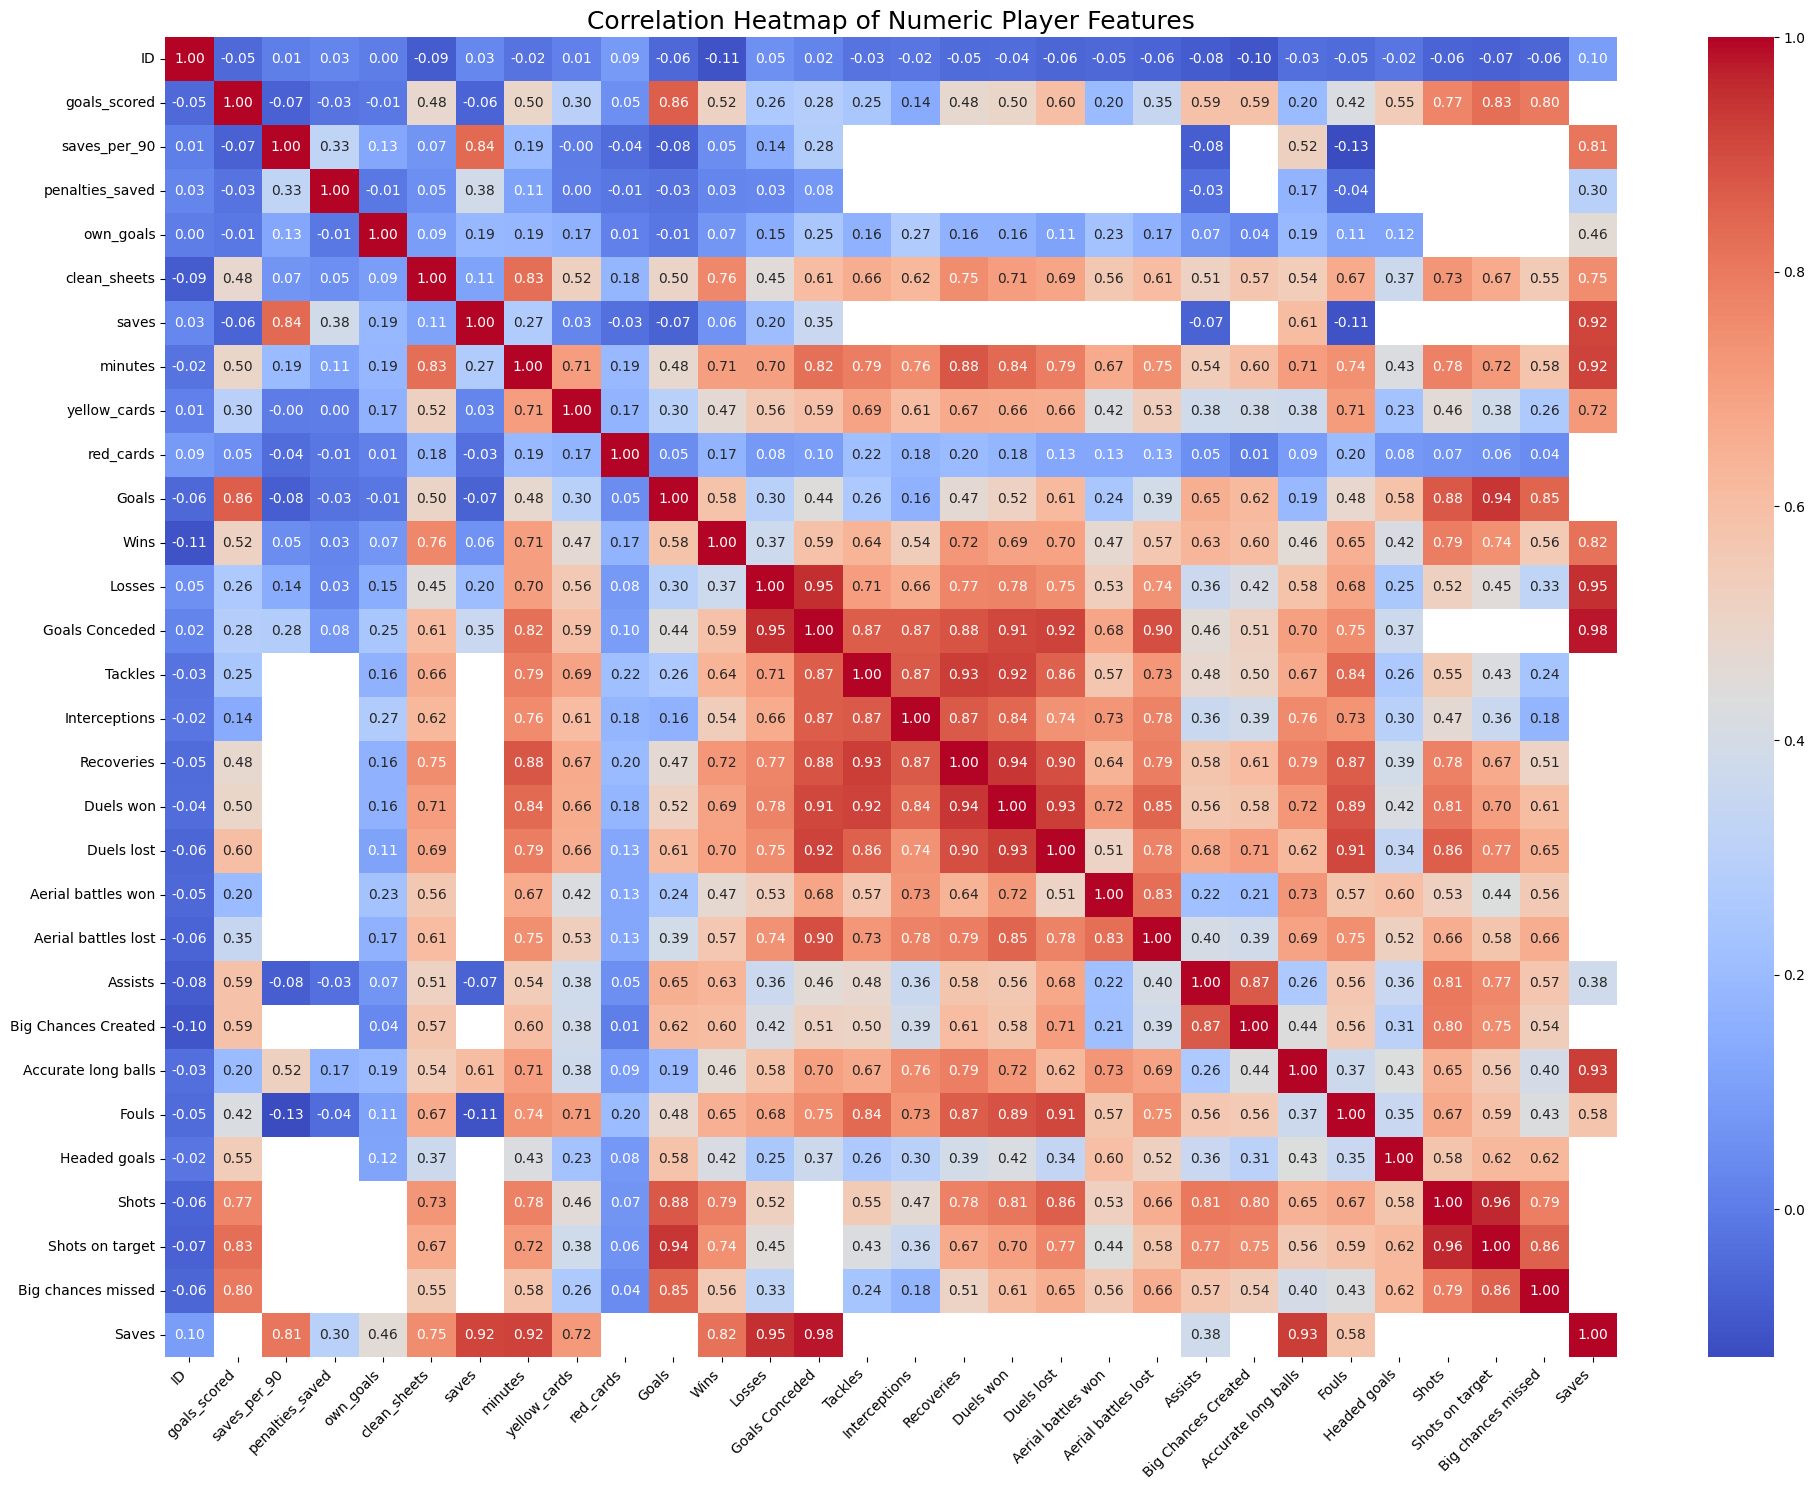

In [8]:
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", annot_kws={"size": 10})
plt.title("Correlation Heatmap of Numeric Player Features", fontsize=18)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Top 10 Players by Goals + Assists

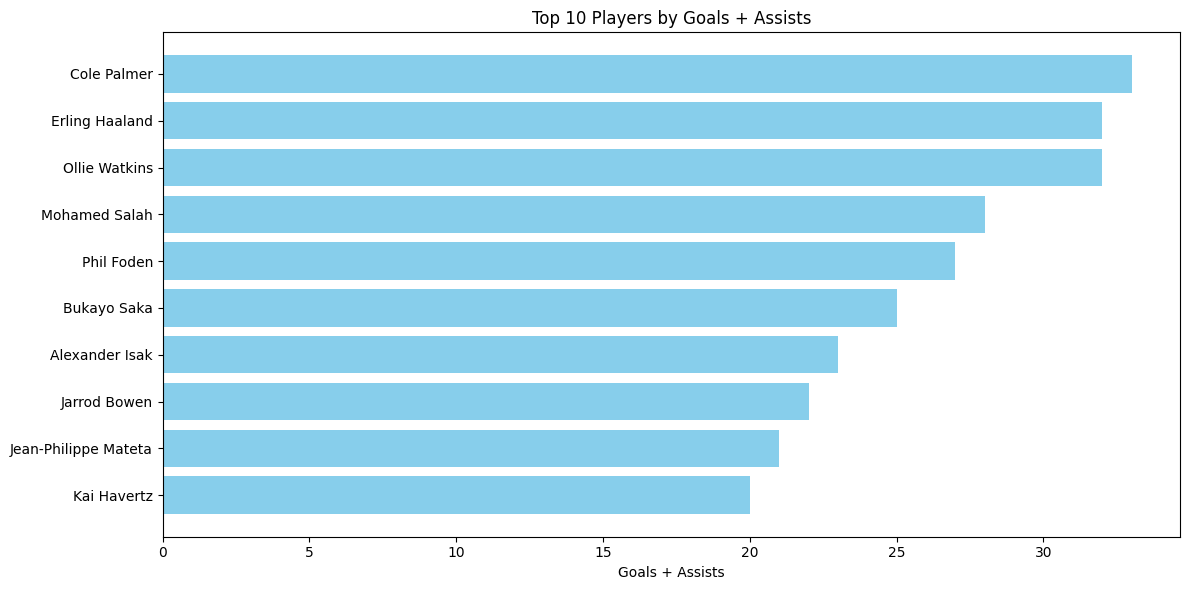

In [9]:
data['Goals_Assists'] = data['Goals'] + data['Assists']
top_15 = data.sort_values(by='Goals_Assists', ascending=False).head(10)
plt.figure(figsize=(12, 6))
plt.barh(top_15['Name'], top_15['Goals_Assists'], color='skyblue')
plt.xlabel('Goals + Assists')
plt.title('Top 10 Players by Goals + Assists')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Top 10 Players by Shots on Target

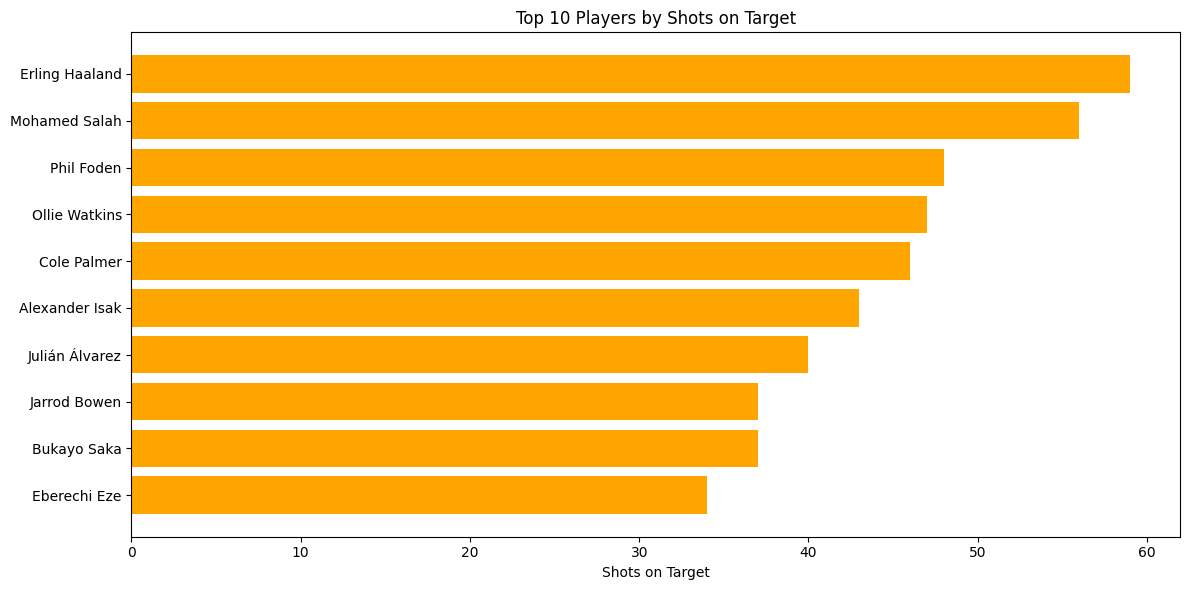

In [10]:
top_shooters = data.sort_values(by='Shots on target', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.barh(top_shooters['Name'], top_shooters['Shots on target'], color='orange')
plt.xlabel('Shots on Target')
plt.title('Top 10 Players by Shots on Target')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Top 10 Goalkeepers by Saves per 90

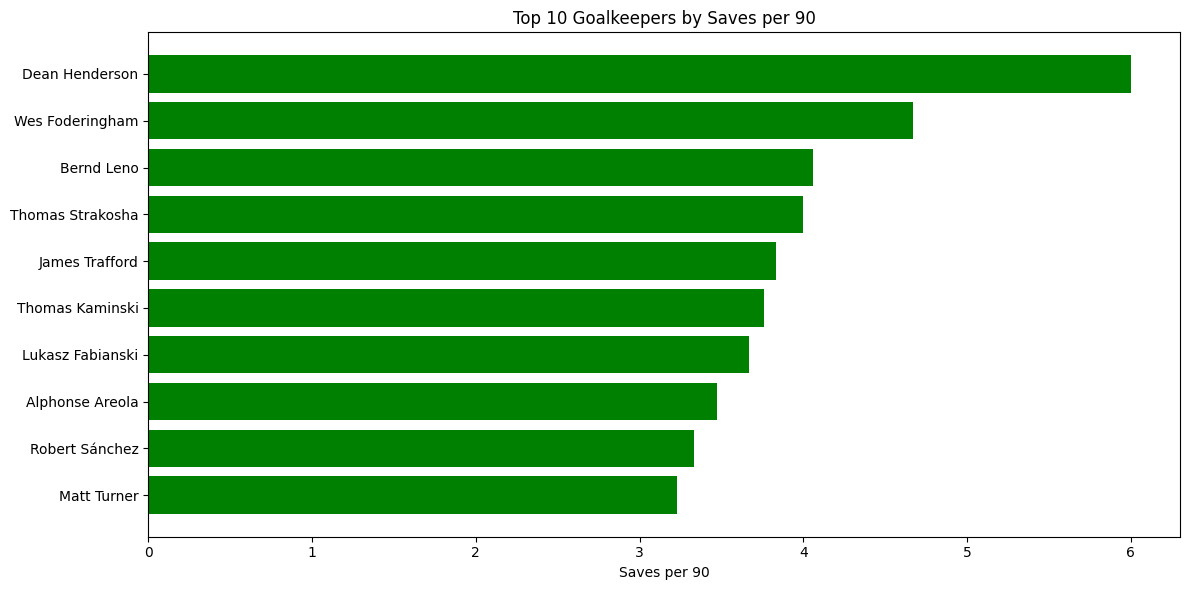

In [11]:
top_keepers = data.sort_values(by='saves_per_90', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.barh(top_keepers['Name'], top_keepers['saves_per_90'], color='green')
plt.xlabel('Saves per 90')
plt.title('Top 10 Goalkeepers by Saves per 90')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Top 10 Defenders by Tackles

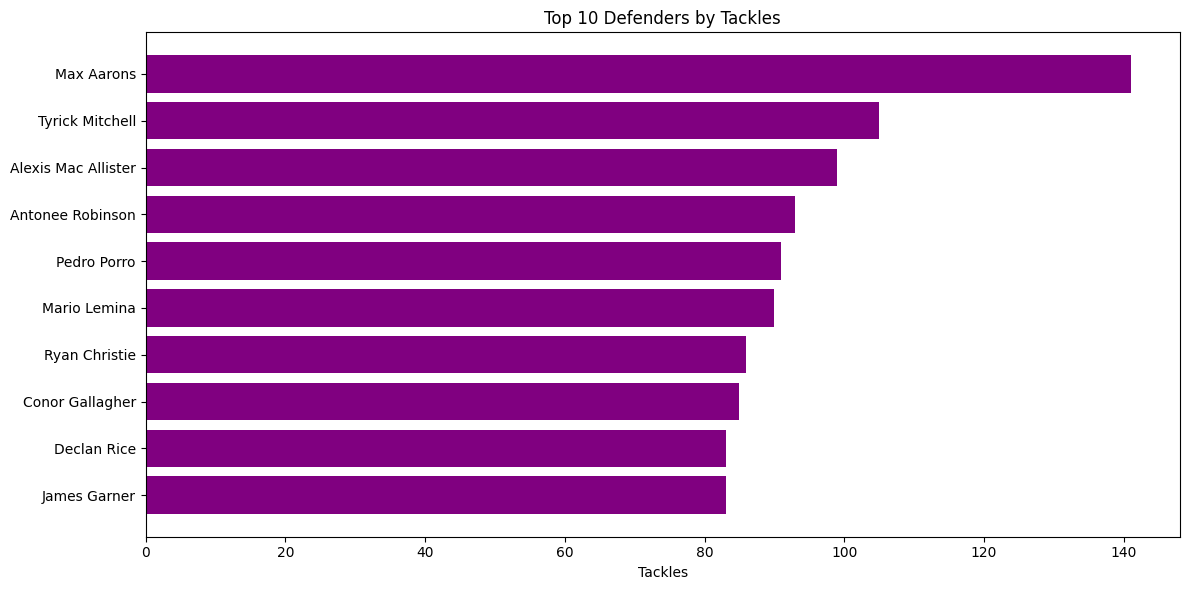

In [12]:
top_defenders = data.sort_values(by='Tackles', ascending=False).head(10)

plt.figure(figsize=(12, 6))
plt.barh(top_defenders['Name'], top_defenders['Tackles'], color='purple')
plt.xlabel('Tackles')
plt.title('Top 10 Defenders by Tackles')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

Top Contributors

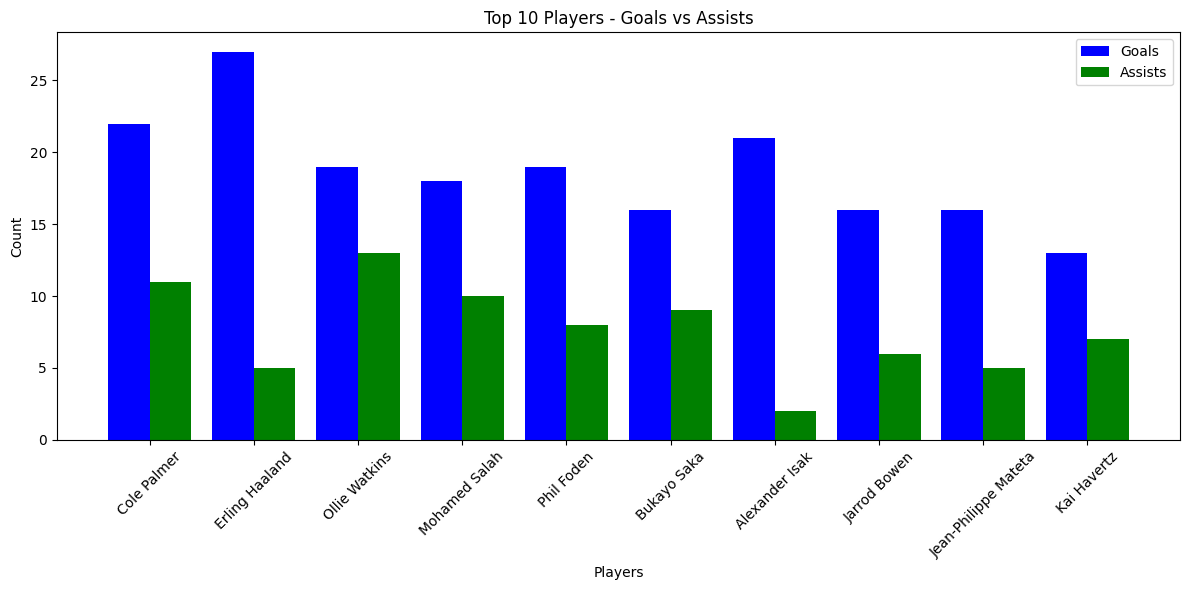

In [13]:
top_contributors = data.sort_values(by='Goals_Assists', ascending=False).head(10)

plt.figure(figsize=(12, 6))
bar_width = 0.4
index = range(len(top_contributors))

plt.bar(index, top_contributors['Goals'], bar_width, label='Goals', color='blue')
plt.bar([i + bar_width for i in index], top_contributors['Assists'], bar_width, label='Assists', color='green')

plt.xlabel('Players')
plt.ylabel('Count')
plt.title('Top 10 Players - Goals vs Assists')
plt.xticks([i + bar_width / 2 for i in index], top_contributors['Name'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

Total Goals

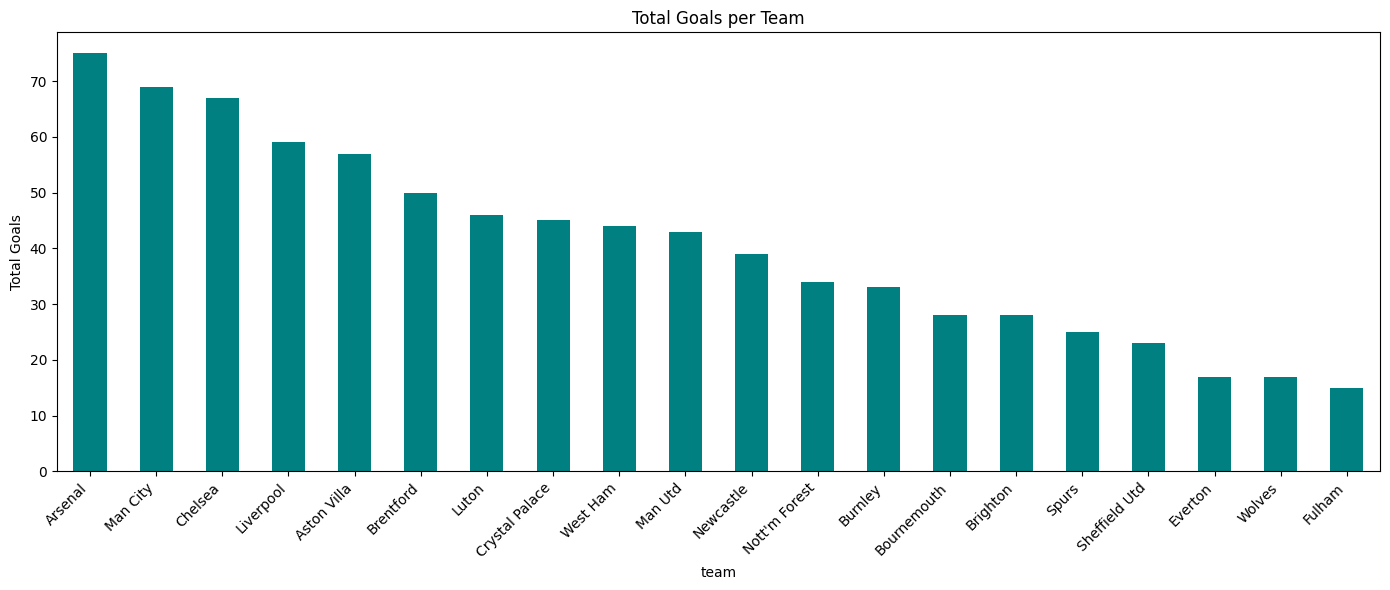

In [14]:
team_goals = data.groupby('team')['Goals'].sum().sort_values(ascending=False)

plt.figure(figsize=(14, 6))
team_goals.plot(kind='bar', color='teal')
plt.ylabel('Total Goals')
plt.title('Total Goals per Team')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Total Contributions By % And The Teams

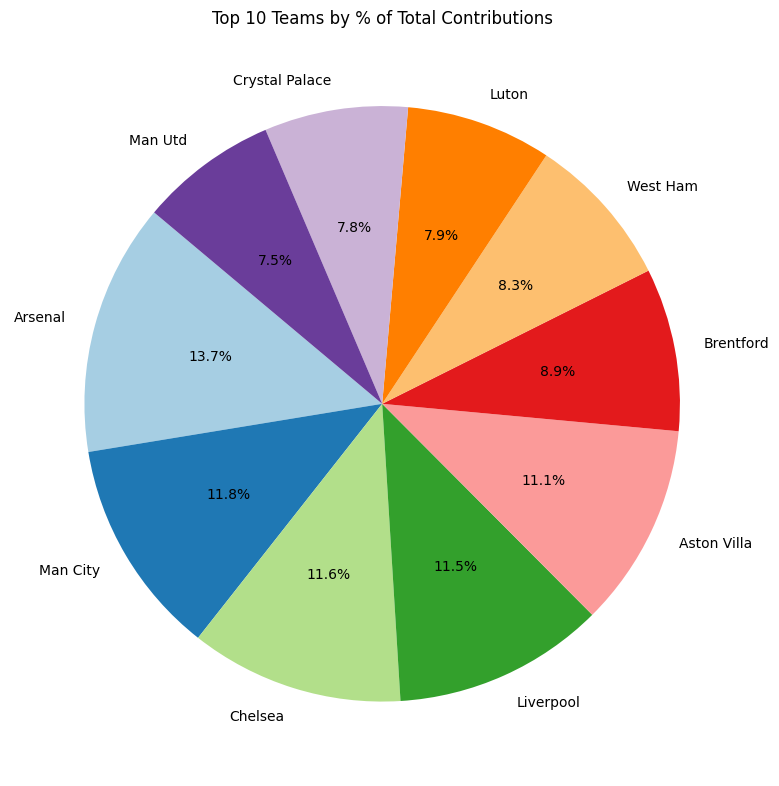

In [15]:
data['Total_Contributions'] = data['Goals'] + data['Assists']

team_contributions = data.groupby('team')['Total_Contributions'].sum()
team_contributions_percent = team_contributions / team_contributions.sum() * 100
top_teams = team_contributions_percent.sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 8))
plt.pie(top_teams, labels=top_teams.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Top 10 Teams by % of Total Contributions')
plt.tight_layout()
plt.show()

Goals & Asissts Per Teams

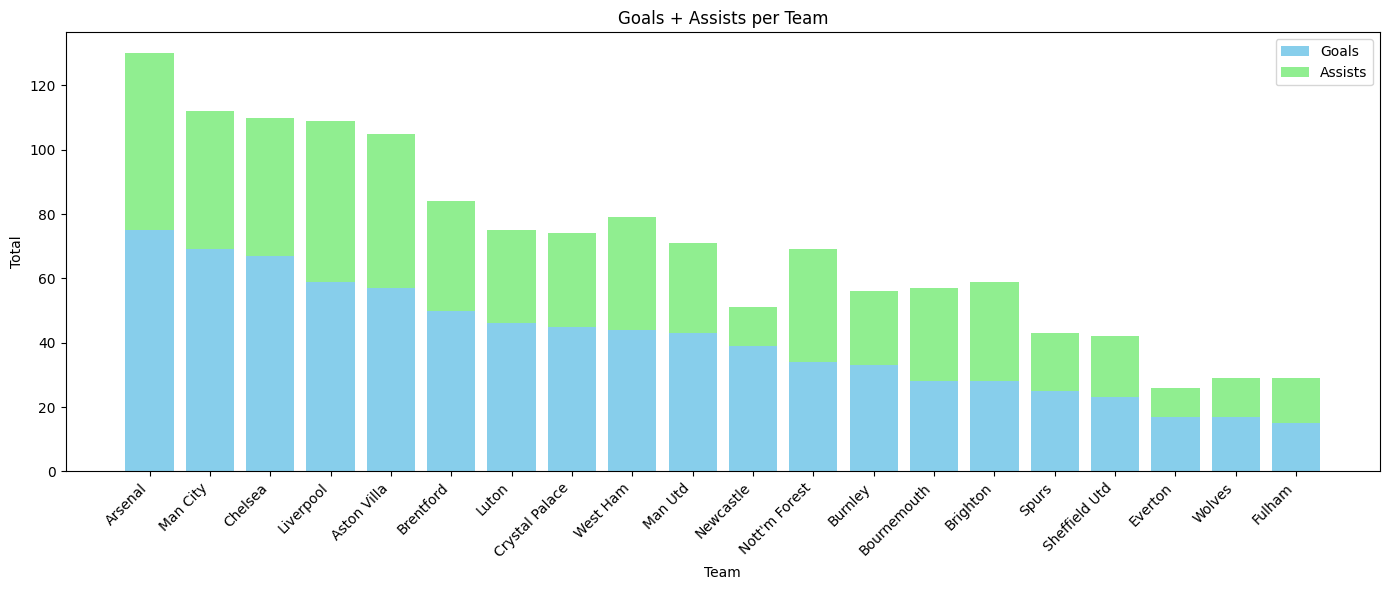

In [16]:
team_stats = data.groupby('team')[['Goals', 'Assists']].sum().sort_values(by='Goals', ascending=False)

plt.figure(figsize=(14, 6))
plt.bar(team_stats.index, team_stats['Goals'], label='Goals', color='skyblue')
plt.bar(team_stats.index, team_stats['Assists'], bottom=team_stats['Goals'], label='Assists', color='lightgreen')

plt.xlabel('Team')
plt.ylabel('Total')
plt.title('Goals + Assists per Team')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

Number Of Players Per Team

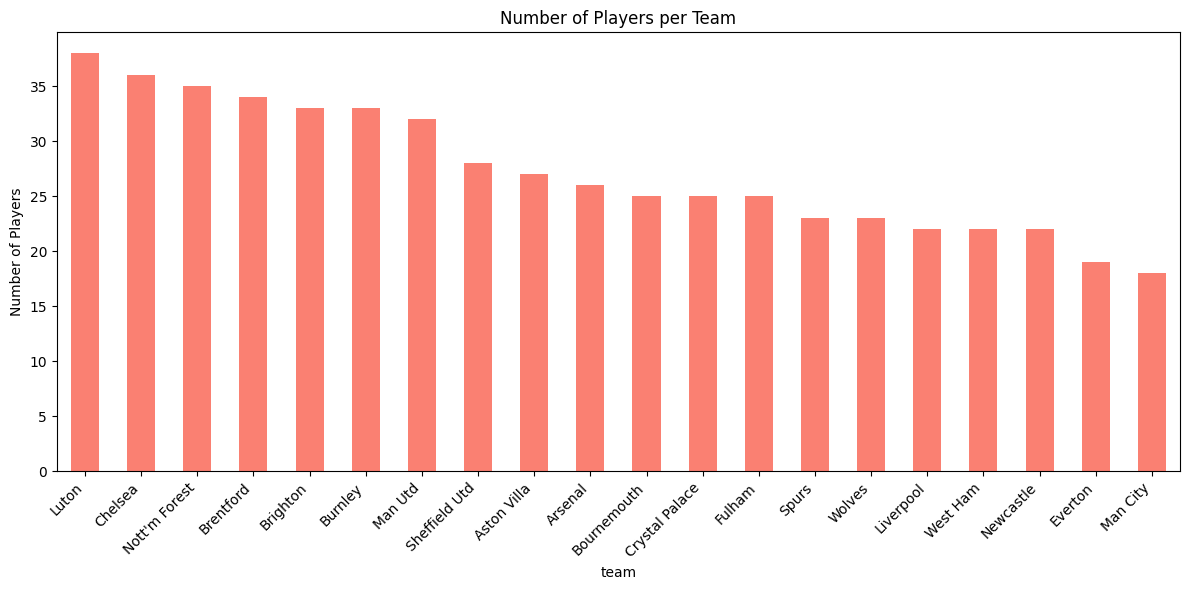

In [17]:
team_counts = data['team'].value_counts()

plt.figure(figsize=(12, 6))
team_counts.plot(kind='bar', color='salmon')
plt.ylabel('Number of Players')
plt.title('Number of Players per Team')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## ⚙️ Data Preprocessing

In [18]:
numeric_columns = [
    'saves_per_90', 'penalties_saved', 'own_goals', 'clean_sheets', 'saves',
    'minutes', 'yellow_cards', 'red_cards', 'Goals', 'Wins', 'Losses',
    'Goals Conceded', 'Tackles', 'Interceptions', 'Recoveries', 'Duels won',
    'Duels lost', 'Aerial battles won', 'Aerial battles lost', 'Assists',
    'Passes', 'Big Chances Created', 'Accurate long balls', 'Fouls',
    'Headed goals', 'Shots', 'Shots on target', 'Big chances missed'
]

In [19]:
data.isnull().sum()

ID                       0
Name                     0
position                 0
team                     0
goals_scored             0
saves_per_90             0
penalties_saved          0
own_goals                0
clean_sheets             0
saves                    0
minutes                  0
yellow_cards             0
red_cards                0
Goals                    0
Wins                     0
Losses                   0
Goals Conceded         317
Tackles                 58
Tackle success %       185
Interceptions           58
Recoveries             185
Duels won              185
Duels lost             185
Aerial battles won     185
Aerial battles lost    185
Assists                  0
Passes                   0
Big Chances Created     58
Cross accuracy %       185
Accurate long balls    127
Fouls                    0
Headed goals            58
Shots                  229
Shots on target        229
Shooting accuracy %    229
Big chances missed     229
Saves                  488
G

In [20]:
def convert_percentage(value):
    if pd.isna(value):
        return np.nan
    if isinstance(value, str):
        if '%' in value:
            return float(value.strip('%')) / 100
        value = value.replace(',', '')
    try:
        return float(value)
    except (ValueError, TypeError):
        return np.nan

In [21]:
for col in numeric_columns:
    if col in data.columns:
        data[col] = data[col].apply(convert_percentage)

In [22]:
percentage_columns = ['Tackle success %', 'Cross accuracy %', 'Shooting accuracy %']
for col in percentage_columns:
    if col in data.columns:
        data[col] = data[col].apply(convert_percentage)

In [23]:
numeric_cols = data.select_dtypes(include=[np.number]).columns
non_numeric_cols = data.select_dtypes(exclude=[np.number]).columns

In [24]:
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

In [25]:
data[non_numeric_cols] = data[non_numeric_cols].fillna(data[non_numeric_cols].mode().iloc[0])

In [26]:
label_encoder = LabelEncoder()
categorical_columns = ['position', 'team']
for col in categorical_columns:
    if col in data.columns:
        data[col] = label_encoder.fit_transform(data[col])

## 🧠 Feature Engineering

In [27]:
data['Total_Contributions'] = data['Goals'] + data['Assists']
data['Minutes_per_Goal'] = data['minutes'] / (data['Goals'] + 1)
data['Minutes_per_Assist'] = data['minutes'] / (data['Assists'] + 1)

columns_to_drop = ['minutes', 'Name']
data = data.drop(columns=[col for col in columns_to_drop if col in data.columns])

In [28]:
def bin_values(x):
    if x == 0:
        return 0
    elif x <= 5:
        return 1
    elif x <= 10:
        return 2
    elif x <= 15:
        return 3
    elif x <= 20:
        return 4
    else:
        return 5

data['Goals_Category'] = data['Goals'].apply(bin_values)
data['Assists_Category'] = data['Assists'].apply(bin_values)

In [29]:
X = data.drop(columns=['Goals', 'Assists', 'Goals_Category', 'Assists_Category','goals_scored'])
y_goals = data['Goals']  
y_assists = data['Assists']  
y_goals_cat = data['Goals_Category']  
y_assists_cat = data['Assists_Category']  

In [30]:
print(X.columns.tolist())

['ID', 'position', 'team', 'saves_per_90', 'penalties_saved', 'own_goals', 'clean_sheets', 'saves', 'yellow_cards', 'red_cards', 'Wins', 'Losses', 'Goals Conceded', 'Tackles', 'Tackle success %', 'Interceptions', 'Recoveries', 'Duels won', 'Duels lost', 'Aerial battles won', 'Aerial battles lost', 'Passes', 'Big Chances Created', 'Cross accuracy %', 'Accurate long balls', 'Fouls', 'Headed goals', 'Shots', 'Shots on target', 'Shooting accuracy %', 'Big chances missed', 'Saves', 'Goals_Assists', 'Total_Contributions', 'Minutes_per_Goal', 'Minutes_per_Assist']


In [31]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [32]:
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

## 📈 Model Training and Evaluation

In [33]:
X_train_reg, X_test_reg, y_train_goals_reg, y_test_goals_reg, y_train_assists_reg, y_test_assists_reg = train_test_split(
    X_scaled, y_goals, y_assists, test_size=0.2, random_state=42
)

X_train_clf, X_test_clf, y_train_goals_clf, y_test_goals_clf, y_train_assists_clf, y_test_assists_clf = train_test_split(
    X_scaled, y_goals_cat, y_assists_cat, test_size=0.2, random_state=42
)

# Regression models XGBoost

In [34]:
xgb_goals_reg = XGBRegressor(
    random_state=42,
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1
)

In [35]:
xgb_assists_reg = XGBRegressor(
    random_state=42,
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1
)

In [36]:
print("Training regression models...")
xgb_goals_reg.fit(X_train_reg, y_train_goals_reg)
xgb_assists_reg.fit(X_train_reg, y_train_assists_reg)

Training regression models...


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [37]:
y_pred_goals_reg = xgb_goals_reg.predict(X_test_reg)
y_pred_assists_reg = xgb_assists_reg.predict(X_test_reg)

In [38]:
def evaluate_regression(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\nRegression Results for {model_name}:")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"Root Mean Squared Error: {rmse:.4f}")
    print(f"R2 Score: {r2:.4f}")

In [39]:
print("\nEvaluating Models:")
evaluate_regression(y_test_goals_reg, y_pred_goals_reg, "Goals")
evaluate_regression(y_test_assists_reg, y_pred_assists_reg, "Assists")


Evaluating Models:

Regression Results for Goals:
Mean Squared Error: 0.3524
Root Mean Squared Error: 0.5937
R2 Score: 0.9587

Regression Results for Assists:
Mean Squared Error: 0.2111
Root Mean Squared Error: 0.4594
R2 Score: 0.9337


In [40]:
joblib.dump(xgb_goals_reg, 'goals_regression_model_XGB.pkl')

['goals_regression_model_XGB.pkl']

In [41]:
joblib.dump(xgb_assists_reg, 'assists_regression_model_XGB.pkl')

['assists_regression_model_XGB.pkl']

# Classification model XGBoost

In [42]:
xgb_goals_clf = XGBClassifier(
    random_state=42,
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1
)

In [43]:
xgb_assists_clf = XGBClassifier(
    random_state=42,
    n_estimators=200,
    max_depth=6,
    learning_rate=0.1
)

In [44]:
print("Training classification models...")
xgb_goals_clf.fit(X_train_clf, y_train_goals_clf)
xgb_assists_clf.fit(X_train_clf, y_train_assists_clf)

Training classification models...


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [45]:
def evaluate_classification(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    
    print(f"\nClassification Results for {model_name}:")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
y_pred_goals_clf = xgb_goals_clf.predict(X_test_clf)
def evaluate_classification(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    
    print(f"\nClassification Results for {model_name}:")
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
y_pred_assists_clf = xgb_assists_clf.predict(X_test_clf)

In [46]:
print("\nEvaluating Models:")
evaluate_classification(y_test_goals_clf, y_pred_goals_clf, "Goals Categories")
evaluate_classification(y_test_assists_clf, y_pred_assists_clf, "Assists Categories")


Evaluating Models:

Classification Results for Goals Categories:
Accuracy: 92.73%
Precision: 0.9178
Recall: 0.9273
F1 Score: 0.9213

Classification Results for Assists Categories:
Accuracy: 97.27%
Precision: 0.9727
Recall: 0.9727
F1 Score: 0.9726


c:\Users\Mostafa Ismael\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [47]:
joblib.dump(xgb_goals_clf, 'goals_classification_model_XGB.pkl')

['goals_classification_model_XGB.pkl']

In [48]:
joblib.dump(xgb_assists_clf, 'assists_classification_model_XGB.pkl')

['assists_classification_model_XGB.pkl']

# Regression models RandomForest

In [49]:
rf_goals_reg = RandomForestRegressor(random_state=42)
rf_assists_reg = RandomForestRegressor(random_state=42)

In [50]:
rf_goals_reg.fit(X_train_reg, y_train_goals_reg)
rf_assists_reg.fit(X_train_reg, y_train_assists_reg)

RandomForestRegressor(random_state=42)

In [51]:
y_pred_goals_reg = rf_goals_reg.predict(X_test_reg)
y_pred_assists_reg = rf_assists_reg.predict(X_test_reg)

In [52]:
print("=== Goals Regression ===")
print("MSE:", mean_squared_error(y_test_goals_reg, y_pred_goals_reg))
print("R2 Score:", r2_score(y_test_goals_reg, y_pred_goals_reg))

=== Goals Regression ===
MSE: 0.6304127272727272
R2 Score: 0.9261175456438568


In [53]:
print("\n=== Assists Regression ===")
print("MSE:", mean_squared_error(y_test_assists_reg, y_pred_assists_reg))
print("R2 Score:", r2_score(y_test_assists_reg, y_pred_assists_reg))


=== Assists Regression ===
MSE: 0.15699
R2 Score: 0.9506910237773856


In [54]:
joblib.dump(rf_goals_reg, 'random_forest_goals_reg.pkl')

['random_forest_goals_reg.pkl']

In [55]:
joblib.dump(rf_assists_reg, 'random_forest_assists_reg.pkl')

['random_forest_assists_reg.pkl']

# Classification models RandomForest

In [56]:
rf_goals_clf1 = RandomForestClassifier(random_state=42)
rf_assists_clf1 = RandomForestClassifier(random_state=42)

In [57]:
rf_goals_clf1.fit(X_train_clf, y_train_goals_clf)
rf_assists_clf1.fit(X_train_clf, y_train_assists_clf)

RandomForestClassifier(random_state=42)

In [58]:
y_pred_goals_clf1 = rf_goals_clf1.predict(X_test_clf)
y_pred_assists_clf1 = rf_assists_clf1.predict(X_test_clf)

In [59]:
print("\n=== Goals Category Classification ===")
print("Accuracy:", accuracy_score(y_test_goals_clf, y_pred_goals_clf1))


=== Goals Category Classification ===
Accuracy: 0.9090909090909091


In [60]:
print("\n=== Assists Category Classification ===")
print("Accuracy:", accuracy_score(y_test_assists_clf, y_pred_assists_clf1))


=== Assists Category Classification ===
Accuracy: 0.9818181818181818


In [61]:
importances_goals = rf_goals_clf1.feature_importances_
importances_assists = rf_assists_clf1.feature_importances_
importances_goals_clf = rf_goals_clf1.feature_importances_
importances_assists_clf = rf_assists_clf1.feature_importances_
for name, importance in zip(X.columns, importances_goals):
    print(f"{name}: {importance:.4f}")

ID: 0.0131
position: 0.0044
team: 0.0105
saves_per_90: 0.0017
penalties_saved: 0.0000
own_goals: 0.0015
clean_sheets: 0.0104
saves: 0.0003
yellow_cards: 0.0045
red_cards: 0.0014
Wins: 0.0462
Losses: 0.0149
Goals Conceded: 0.0050
Tackles: 0.0402
Tackle success %: 0.0101
Interceptions: 0.0383
Recoveries: 0.0117
Duels won: 0.0118
Duels lost: 0.0176
Aerial battles won: 0.0120
Aerial battles lost: 0.0079
Passes: 0.0405
Big Chances Created: 0.0136
Cross accuracy %: 0.0093
Accurate long balls: 0.0094
Fouls: 0.0498
Headed goals: 0.0183
Shots: 0.0355
Shots on target: 0.0646
Shooting accuracy %: 0.0319
Big chances missed: 0.0322
Saves: 0.0015
Goals_Assists: 0.1616
Total_Contributions: 0.1440
Minutes_per_Goal: 0.0860
Minutes_per_Assist: 0.0380


In [62]:
joblib.dump(rf_goals_clf1, 'random_forest_goals_clf.pkl')

['random_forest_goals_clf.pkl']

In [63]:
joblib.dump(rf_assists_clf1, 'random_forest_assists_clf.pkl')

['random_forest_assists_clf.pkl']

In [64]:
print("Saving the cleaned data...")
data.to_csv("Cleaned_Players_Data.csv", index=False)
print("Cleaned data saved successfully!")

Saving the cleaned data...
Cleaned data saved successfully!
